# Medical Cost Prediction 

### **Description : Given insurance csv file, and target feature(column). We need to predict the medical cost in health insurance.**

## Step - 1 : Load the data and perform the basic EDA to understand the data.

### Exploratory Data Analysis

In [1]:
#importing requitred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data as dataset
df = pd.read_csv(r"C:\Users\227985\Desktop\Python_Classes\Machine_Learning\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#checking the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#checking duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

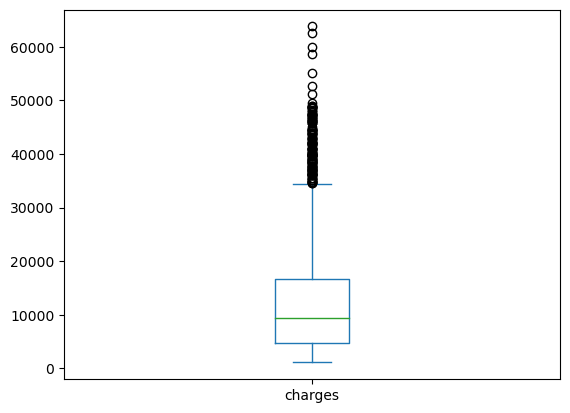

In [5]:
#checking outliers on target column 'df['charges']' using box plot
df['charges'].plot(kind="box")
plt.show()

In [6]:
#converting charges column to a numpy array
numpy_array = np.array([df['charges']])
numpy_array

array([[16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]])

In [7]:
#caculating Qurtaile 1
Q1 = np.percentile(numpy_array, 25)
Q1

4740.28715

In [8]:
#calculating Quartile 3
Q3 = np.percentile(numpy_array, 75)
Q3

16639.912515

In [9]:
#calculating IQR using Quartiles Q1 & Q3
IQR = Q3 - Q1
IQR

11899.625365

In [10]:
#calculating lower limit
lowerlimit = Q1 - 1.5 * IQR
lowerlimit

-13109.1508975

In [11]:
#claculating upper limit
upperlimit = Q3 + 1.5 * IQR
upperlimit

34489.350562499996

In [12]:
#detecting the outliers
Outliers = df[(df.charges<lowerlimit)|(df.charges>upperlimit)]
Outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [13]:
#checking the count of outliers
Outliers.count()

age         139
sex         139
bmi         139
children    139
smoker      139
region      139
charges     139
dtype: int64

In [14]:
#removing the outliers using clip method
df['charges'] = np.clip(df['charges'], lowerlimit, upperlimit)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
#checking wether outliers are there or not
outliers = df[(df.charges<lowerlimit)|(df.charges>upperlimit)]
outliers

,age,sex,bmi,children,smoker,region,charges


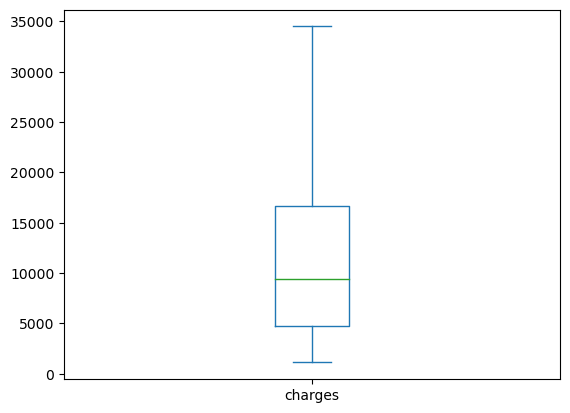

In [16]:
#checking the outliers after removal using box plot
df['charges'].plot(kind="box")
plt.show()

### Univariate Analysis

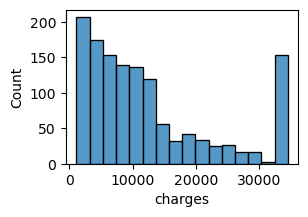

In [17]:
#Univariate Analysis on numerical column using hist plot
plt.figure(figsize=(3,2))
sns.histplot(df['charges'])
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


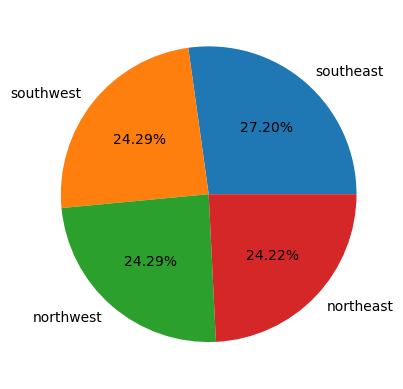

In [18]:
#Univariate analysis on chategorical column using pie plot
x = df['region'].value_counts().head(5)
print(x)
plt.pie(x.values, labels = x.index, autopct='%1.2f%%')
plt.show()

### Bivariate Analysis

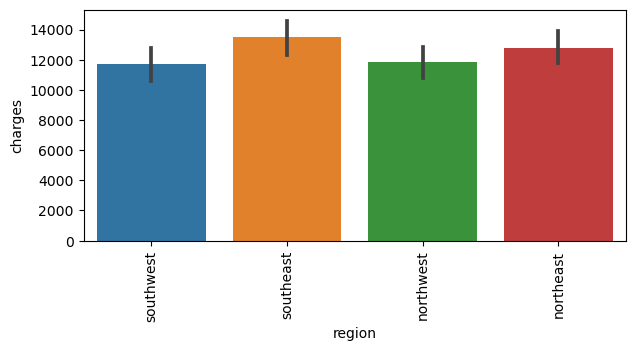

In [19]:
#bi-variate analysis on categorical vs numerical columns using bar plot
plt.figure(figsize=(7,3)) 
sns.barplot(x=df['region'], y=df['charges']) 
plt.xticks(rotation = 90) 
plt.show()

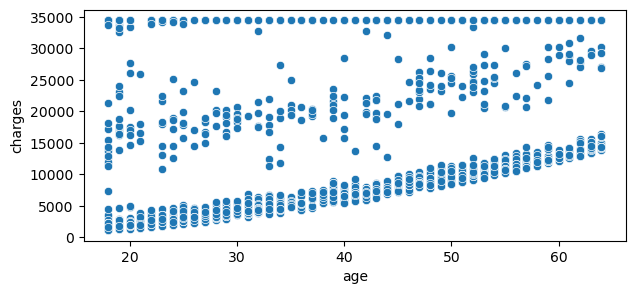

In [20]:
#bi-variate analysis on numerical vs numerical columns using scatter plot
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['age'], y=df['charges'])
plt.show()

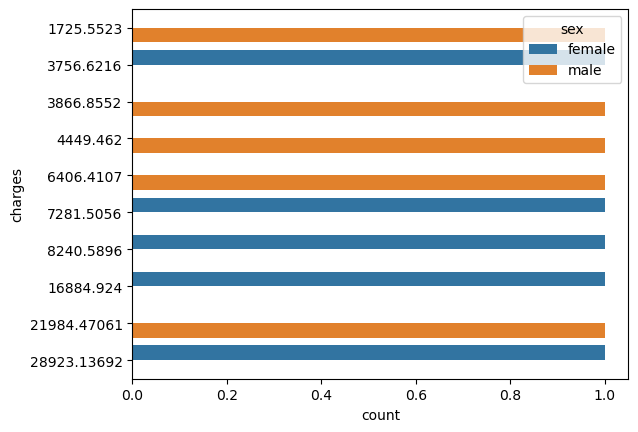

In [21]:
#bi-variate analysis on numerical vs categorical columns using count plot
sns.countplot(x, y=df['charges'].head(10) , hue=df['sex'].head(10))
plt.show()

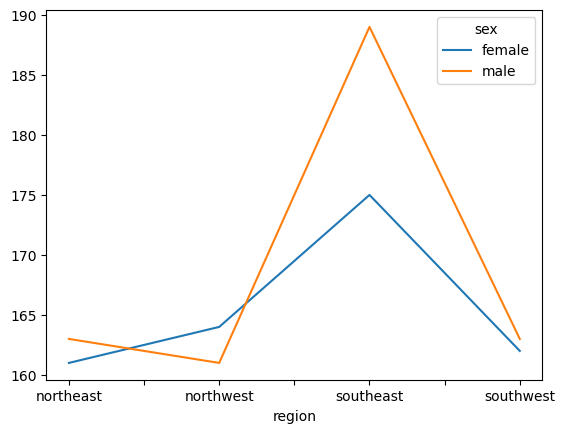

In [22]:
#bi-variate analysis on categorical vs categorical columns using crosstab
pd.crosstab(df.region,df.sex).plot()
plt.show()

### Multi-variate Analysis

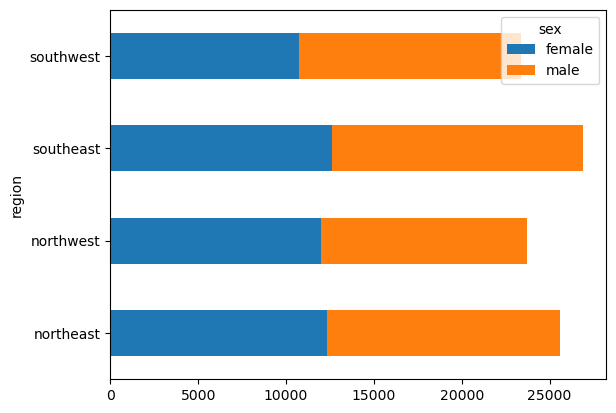

In [23]:
#Multi-variate analysis using pivot table
df.pivot_table('charges', index='region', columns='sex',fill_value=0).head(50).plot(kind='barh', stacked=True)
plt.show()

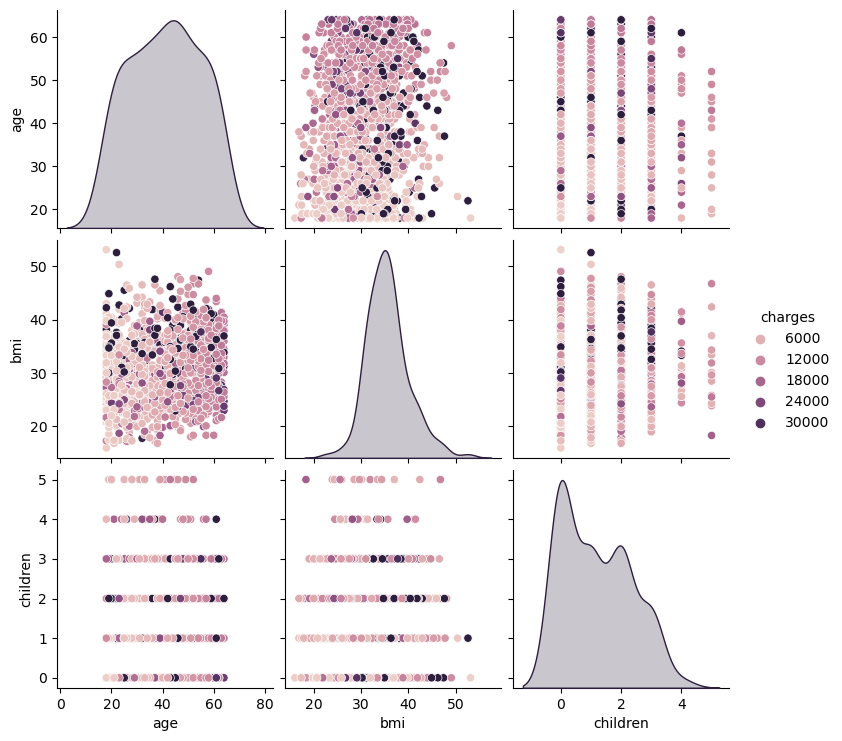

In [24]:
sns.pairplot(df, hue='charges')

## Step 2 : Documentation
    - Identify the input and output/target variables
        - Input Variables : {age, sex, bmi, children, smoker, region}
        - Output Variable : {charges}
    - Identify the type of ML Task
        - Type of given ML task is : Supervised Learning --> Regression
    - Identify the Evaluation Metric.
        - For regression task - Mean Absolute Error
                              - Mean Squared Error
                              - Root Mean Squared Error

## Data Preprocessing

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### diving the columns as x and y

In [26]:
#x is the training columns and y is the target column
y = df['charges']
x = df[['age','sex','bmi','children','smoker','region']]

In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [28]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Step 3 : Splitting the dataset into Training and Testing 

In [29]:
#importing train_test_split from model_selection from sklearn to split the data into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1003, 6) (335, 6)
(1003,) (335,)


In [30]:
#checking the dtypes of x_train columns
x_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [31]:
#creating an object for categorical columns
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest
...,...,...,...
763,male,no,northeast
835,male,no,southeast
1216,male,no,southeast
559,male,no,northwest


In [32]:
#creating an object for numerical columns 
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0
...,...,...,...
763,27,26.03,0
835,42,35.97,2
1216,40,25.08,0
559,19,35.53,0


In [33]:
#fetching the numerical columns using select_dtypes method
x_train_num = x_train.select_dtypes(include=['number'])
x_train_num

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0
...,...,...,...
763,27,26.03,0
835,42,35.97,2
1216,40,25.08,0
559,19,35.53,0


In [34]:
x_train_num.head()

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0


In [35]:
x_train_cat.head()

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest


## Step 4 : Data preparation on train data

### For Categorical -  Performing Label Encoding 

In [36]:
x_train_cat_le = pd.DataFrame(index=x_train_cat.index)
x_train_cat_le.head()

""
1075
131
15
1223
1137


In [37]:
x_train_cat.head()

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest


In [38]:
#checking unique rows in 'sex' column and returns an array
x_train_cat.sex.unique()

array(['female', 'male'], dtype=object)

In [39]:
#applying lambda function on 'sex' column
sex_encoder = {'male':1, 'female':2}

x_train_cat_le['sex'] = x_train_cat['sex'].apply(lambda x : sex_encoder[x])

x_train_cat_le.head()

,sex
1075,2
131,2
15,1
1223,2
1137,2


In [40]:
#checking unique rows in 'smoker' column and returns an array
x_train_cat.smoker.unique()

array(['no', 'yes'], dtype=object)

In [41]:
#applying lambda function on 'smoker' column
smoker_encoder = {'yes':1, 'no':2}

x_train_cat_le['smoker'] = x_train_cat['smoker'].apply(lambda x : smoker_encoder[x])

x_train_cat_le.head()

,sex,smoker
1075,2,2
131,2,2
15,1,2
1223,2,1
1137,2,2


In [42]:
#checking unique rows in 'region' column and returns an array
x_train_cat.region.unique()

array(['southeast', 'northeast', 'southwest', 'northwest'], dtype=object)

In [43]:
#applying lambda function on 'region' column
region_encoder = {'southeast':1, 'northeast':2, 'southwest':3, 'northwest':4}

x_train_cat_le['region'] = x_train_cat['region'].apply(lambda x : region_encoder[x])

x_train_cat_le.head()

,sex,smoker,region
1075,2,2,1
131,2,2,2
15,1,2,3
1223,2,1,1
1137,2,2,4


In [44]:
x_train_num.head()

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0


### For Numerical Variables - Performing Standardization 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns = x_train_num.columns,
                                   index = x_train_num.index)
x_train_num_rescaled.head()

,age,bmi,children
1075,-0.514853,-0.181331,-0.063607
131,1.548746,-1.393130,-0.892144
15,-1.439915,-0.982242,-0.063607
1223,-1.368757,-1.011133,-0.892144
1137,-0.941805,-1.362635,-0.892144


In [46]:
#merging x_train_num data and x_train_cat_le data using concat method which is called x_train_transformed data
x_train_transform = pd.concat([x_train_num_rescaled, x_train_cat_le], axis =1)

x_train_transform.head()

,age,bmi,children,sex,smoker,region
1075,-0.514853,-0.181331,-0.063607,2,2,1
131,1.548746,-1.393130,-0.892144,2,2,2
15,-1.439915,-0.982242,-0.063607,1,2,3
1223,-1.368757,-1.011133,-0.892144,2,1,1
1137,-0.941805,-1.362635,-0.892144,2,2,4


## Step 5 : Data preparation on test data

In [47]:
x_test.head()

,age,sex,bmi,children,smoker,region
578,52,male,30.200,1,no,southwest
610,47,female,29.370,1,no,southeast
569,48,male,40.565,2,yes,northwest
1034,61,male,38.380,0,no,northwest
198,51,female,18.050,0,no,northwest


In [48]:
#checing the information of x_test data
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 578 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


### For Numerical Variables - Performing Standardization 

In [49]:
#fetching 'numerical' type columns in x_test data
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()

,age,bmi,children
578,52,30.200,1
610,47,29.370,1
569,48,40.565,2
1034,61,38.380,0
198,51,18.050,0


In [50]:
#Performing standardization and rescaling x_train numerical data
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                  columns = x_test_num.columns,
                                  index = x_test_num.index)
x_test_num_rescaled.head()

,age,bmi,children
578,0.908319,-0.083424,-0.063607
610,0.552526,-0.216642,-0.063607
569,0.623684,1.580192,0.764931
1034,1.548746,1.229492,-0.892144
198,0.837160,-2.033538,-0.892144


### For Categorical - Performing Label Encoding 

In [51]:
#fetching 'object' type columns in x_test data
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat.head()

,sex,smoker,region
578,male,no,southwest
610,female,no,southeast
569,male,yes,northwest
1034,male,no,northwest
198,female,no,northwest


In [52]:
#performing Label Encoding on x_test categorical data
x_test_cat_le = pd.DataFrame(index = x_test_cat.index)

x_test_cat_le.head()

""
578
610
569
1034
198


In [53]:
#applying lambda function on all the 'object' type columns in x_test categorical data
x_test_cat_le['sex'] = x_test_cat['sex'].apply(lambda x : sex_encoder[x])

x_test_cat_le['smoker'] = x_test_cat['smoker'].apply(lambda x : smoker_encoder[x])

x_test_cat_le['region'] = x_test_cat['region'].apply(lambda x : region_encoder[x])

x_test_cat_le.head()

,sex,smoker,region
578,1,2,3
610,2,2,1
569,1,1,4
1034,1,2,4
198,2,2,4


In [54]:
#merging x_test_num data and x_test_cat_le data using concat method which is called x_test_transformed data
x_test_transformed = pd.concat([x_test_num_rescaled, x_test_cat_le], axis=1)
x_test_transformed.head()

,age,bmi,children,sex,smoker,region
578,0.908319,-0.083424,-0.063607,1,2,3
610,0.552526,-0.216642,-0.063607,2,2,1
569,0.623684,1.580192,0.764931,1,1,4
1034,1.548746,1.229492,-0.892144,1,2,4
198,0.837160,-2.033538,-0.892144,2,2,4


## Step 6 : Model Building & Step 7 : Evaluation Metrics

### Building the model using Linear Regression, predicting the y_test data and performing the evaluation metrics 

In [55]:
#building the model using Linear Regression algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_transform, y_train)

LinearRegression()

In [56]:
#predicting the y_test data
y_test_pred_LR = regressor.predict(x_test_transformed)

In [57]:
#representing the predicted data into a data frame
temp_df_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_LR})

temp_df_LR.head()

,Actual,Predicted
578,9724.530000,11321.803423
610,8547.691300,9620.518952
569,34489.350562,33154.767425
1034,12950.071200,14853.506530
198,9644.252500,8279.051960


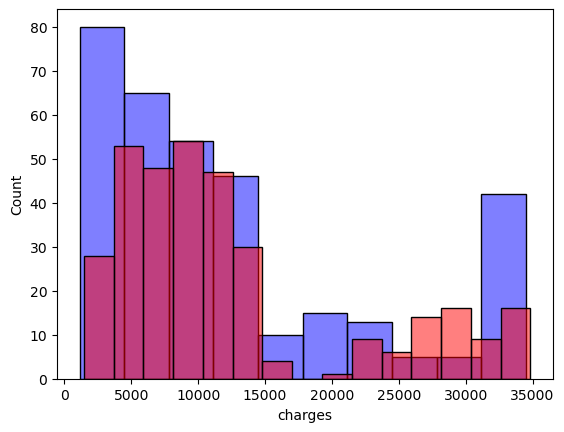

In [58]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_LR, color='red', alpha=0.5)
plt.show()

In [59]:
#evaluation metrics
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_LR))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_LR))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_LR)))

Mean Absolute Error:  3136.79170602569
Mean Squared Error:  22426384.438720256
Root Mean Squared Error:  4735.650371249999


### Building the model using K Nearest Neighbor regression, predicting the y_test data and performing the evaluation metrics

In [60]:
#performing KNN regressor
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transform, y_train)

KNeighborsRegressor()

In [61]:
#predicting the y_test data
y_test_pred_KNN = regressor.predict(x_test_transformed)

In [62]:
#representing the predicted data into a data frame
temp_df_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_KNN})

temp_df_KNN.head()

,Actual,Predicted
578,9724.530000,8433.604400
610,8547.691300,7948.160220
569,34489.350562,22288.946049
1034,12950.071200,13296.952900
198,9644.252500,10320.827930


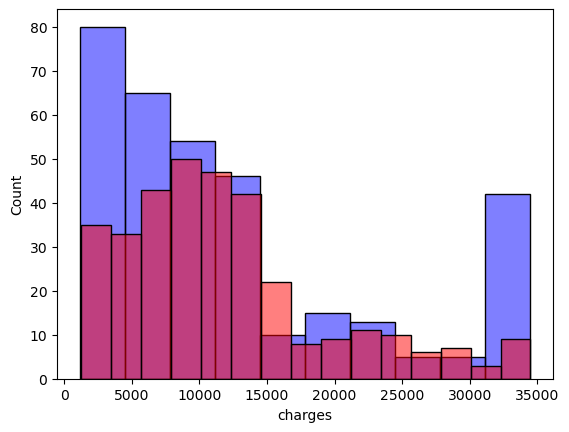

In [63]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_KNN, color='red', alpha=0.5)
plt.show()

In [64]:
#performing evaluation metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_KNN))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_KNN)))

Mean Absolute Error:  3646.1669772761193
Mean Squared Error:  32245806.51877217
Root Mean Squared Error:  5678.539118362413


### Building the model using Decision Tree regression, predicting the y_test data and performing the evaluation metrics

In [65]:
#Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_transform, y_train)

DecisionTreeRegressor()

In [66]:
##predicting the y_test data
y_test_pred_DT = regressor.predict(x_test_transformed)

In [67]:
#representing the predicted data into a data frame
temp_df_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_DT})

temp_df_DT.head()

,Actual,Predicted
578,9724.530000,10085.846000
610,8547.691300,8233.097500
569,34489.350562,34489.350562
1034,12950.071200,13143.864850
198,9644.252500,9264.797000


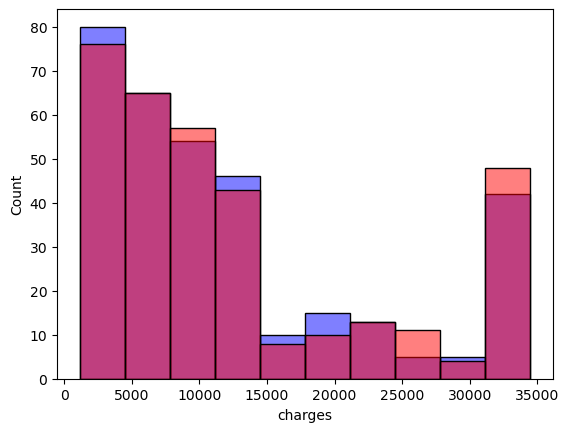

In [68]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_DT, color='red', alpha=0.5)
plt.show()

In [69]:
#performing evaluation metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_DT))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_DT))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_DT)))

Mean Absolute Error:  2637.978499571642
Mean Squared Error:  34997780.54358113
Root Mean Squared Error:  5915.892201822235


### Building the model using Random Forest regression, predicting the y_test data and performing the evaluation metrics

In [70]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_transform, y_train)

RandomForestRegressor()

In [71]:
##predicting the y_test data
y_test_pred_RF = regressor.predict(x_test_transformed)

In [72]:
#representing the predicted data into a data frame
temp_df_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_RF})

temp_df_RF.head()

,Actual,Predicted
578,9724.530000,10512.594143
610,8547.691300,10058.762093
569,34489.350562,34489.350562
1034,12950.071200,13486.723573
198,9644.252500,9576.526458


<Axes: xlabel='charges', ylabel='Count'>

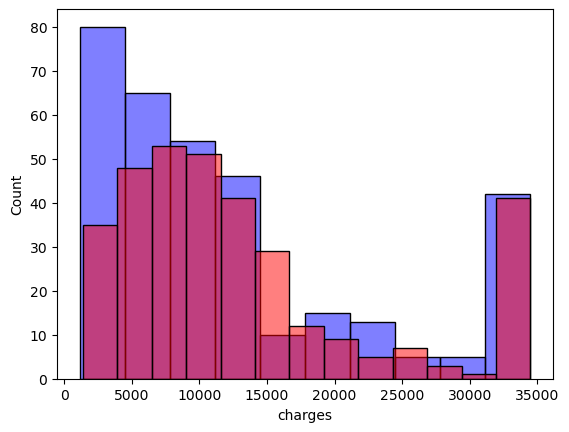

In [73]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_RF, color='red', alpha=0.5)

In [74]:
#performing evaluation metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_RF))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_RF))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_RF)))

Mean Absolute Error:  2397.471201262343
Mean Squared Error:  17177115.345222883
Root Mean Squared Error:  4144.528362217212


### Building the model using Support Vector regression, predicting the y_test data and performing the evaluation metrics

In [75]:
#Support Vector regressor
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_transform, y_train)

SVR()

In [76]:
##predicting the y_test data
y_test_pred_SV = regressor.predict(x_test_transformed)

In [77]:
#representing the predicted data into a data frame
temp_df_SV = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_SV})

temp_df_SV.head()

,Actual,Predicted
578,9724.530000,9499.037832
610,8547.691300,9480.886452
569,34489.350562,9503.305565
1034,12950.071200,9518.400695
198,9644.252500,9474.479088


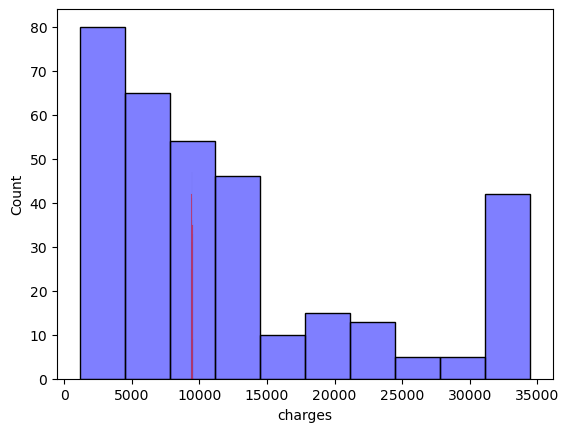

In [78]:
#representing the predicted data in visualization using histplot
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_SV, color='red', alpha=0.5)
plt.show()

In [79]:
#performing evaluation metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_SV))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_SV))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_SV)))

Mean Absolute Error:  7600.701009745731
Mean Squared Error:  114607716.43801884
Root Mean Squared Error:  10705.499354911888


## Step 8 : Displaying a plot which shows all the algorithms applied along with the predicted values

In [80]:
#this is used to create a data frame for actual and predicted values
DF = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_test_pred_LR, 'Predicted_KNN':y_test_pred_KNN, 
                   'Predicted_DT':y_test_pred_DT, 'Predicted_RF':y_test_pred_RF, 'Predicted_SV':y_test_pred_SV})
DF.head(10)

,Actual,Predicted_LR,Predicted_KNN,Predicted_DT,Predicted_RF,Predicted_SV
578,9724.530000,11321.803423,8433.604400,10085.846000,10512.594143,9499.037832
610,8547.691300,9620.518952,7948.160220,8233.097500,10058.762093,9480.886452
569,34489.350562,33154.767425,22288.946049,34489.350562,34489.350562,9503.305565
1034,12950.071200,14853.506530,13296.952900,13143.864850,13486.723573,9518.400695
198,9644.252500,8279.051960,10320.827930,9264.797000,9576.526458,9474.479088
981,4500.339250,4766.588701,2953.472910,4766.022000,12052.690776,9429.168307
31,2198.189850,2112.150310,2588.958100,1615.766700,2593.804098,9388.606146
1256,11436.738150,13364.882824,21383.388190,10269.460000,11898.037750,9496.146673
1219,7537.163900,9099.795334,9434.740730,7209.491800,7231.242203,9455.358307
1320,5425.023350,7709.590734,10655.850560,5693.430500,6535.028979,9440.517728


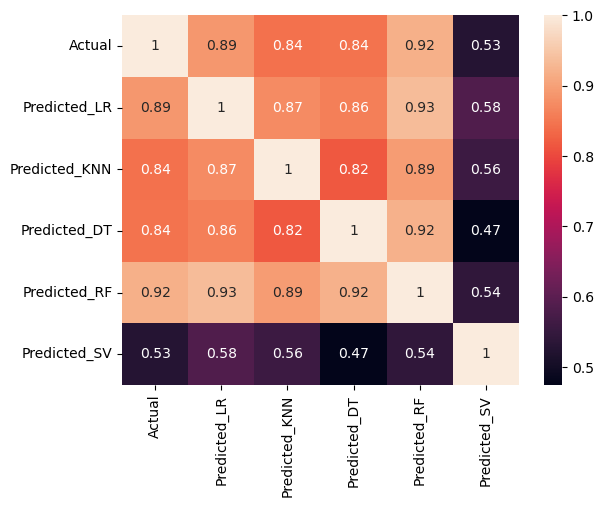

In [81]:
#representing the comparision of actual value and precdited values of all the algorithms in data visualization using heatmap
sns.heatmap(DF.corr(), annot=True)
plt.show()

### Conclusion : 
        After all the comparisions, we can conclude that Random Forest Regression algorithm is suitable for this            Medical Cost Prediction problem